In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("C:\\Users\\chanc\\OneDrive\\Desktop\\EDA\\project1\\Customer Churn.csv")
print(df)

#replacing blanks with 0 as tenure is 0 no total charges are recorded

In [ ]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
df['TotalCharges']=df['TotalCharges'].astype('float')
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [14]:
df['customerID'].duplicated().sum()

np.int64(0)

In [22]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'
    
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)


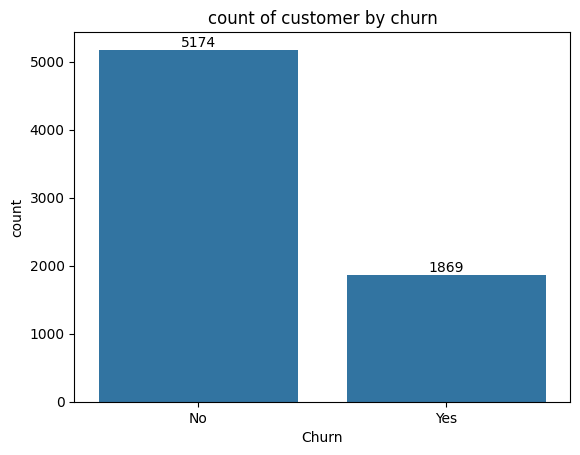

In [33]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn")
plt.show()

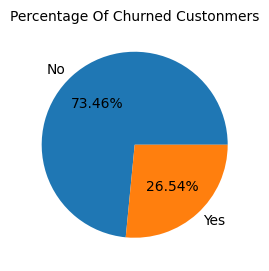

In [36]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
gb
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage Of Churned Custonmers",fontsize=10)
plt.show()

<span style="font-size:12px">From the given pie chart we can conclude that 26.54% of our customers have turned out, now let's explore the reason behind it<span>

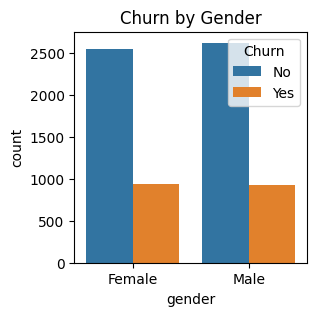

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title("Churn by Gender")
plt.show()

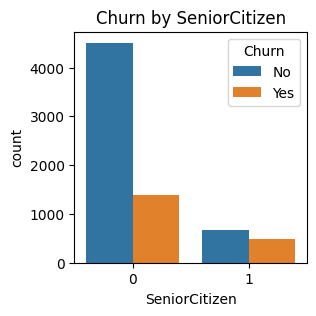

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title("Churn by SeniorCitizen")
plt.show()

#comparatively a greater percentage of people in senior citizen category have churned

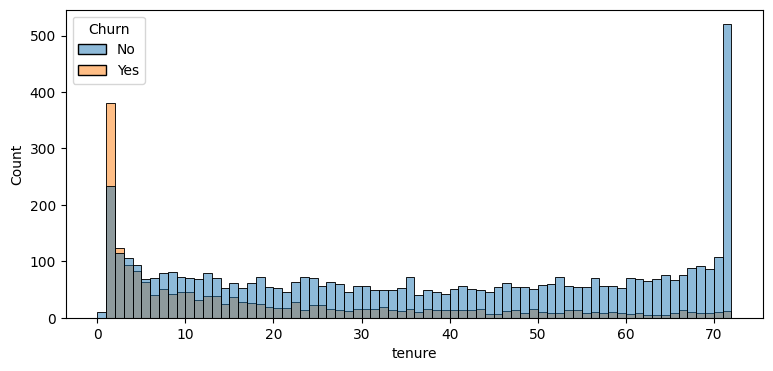

In [20]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned out

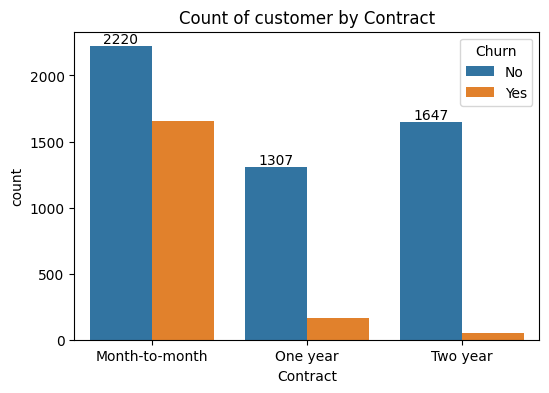

In [27]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Contract")
plt.show()

#people who have month to month contract are likely to churn then those who have 1 or 2 year contract.

In [28]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

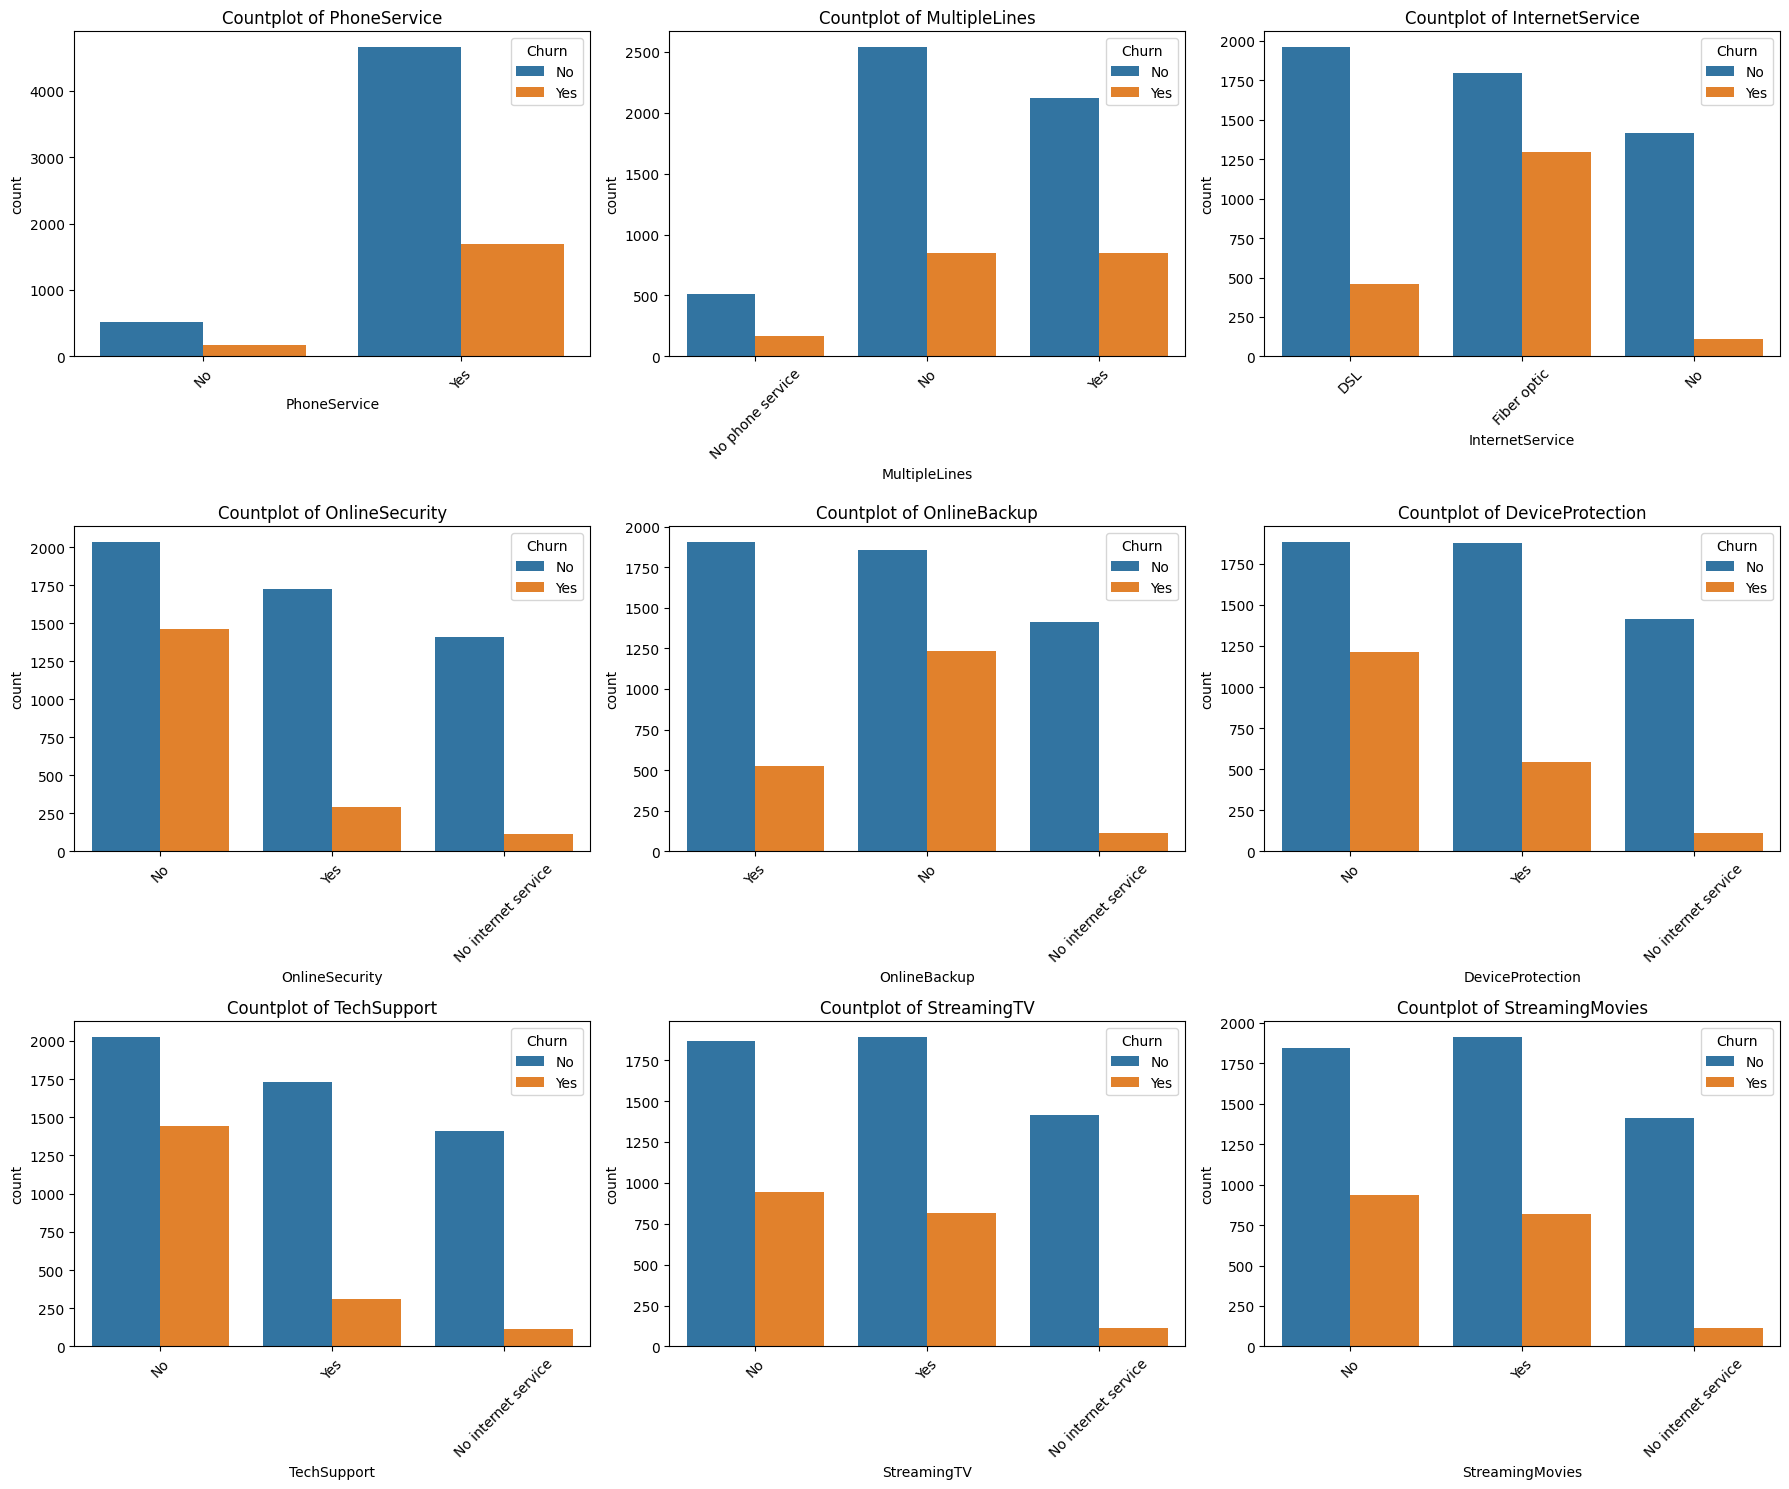

In [4]:

# List of columns for which we want to create countplots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplot grid (3 rows x 3 columns for 9 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through columns and plot countplot on each subplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.show()


#Customers without services like **TechSupport, OnlineSecurity, OnlineBackup, and DeviceProtection** have significantly higher churn rates.
**Fiber Optic InternetService** shows higher churn compared to DSL or no service.
Streaming services show a mild increase in churn, while PhoneService and MultipleLines have less impact.
Overall, having additional support and security services helps reduce customer churn.


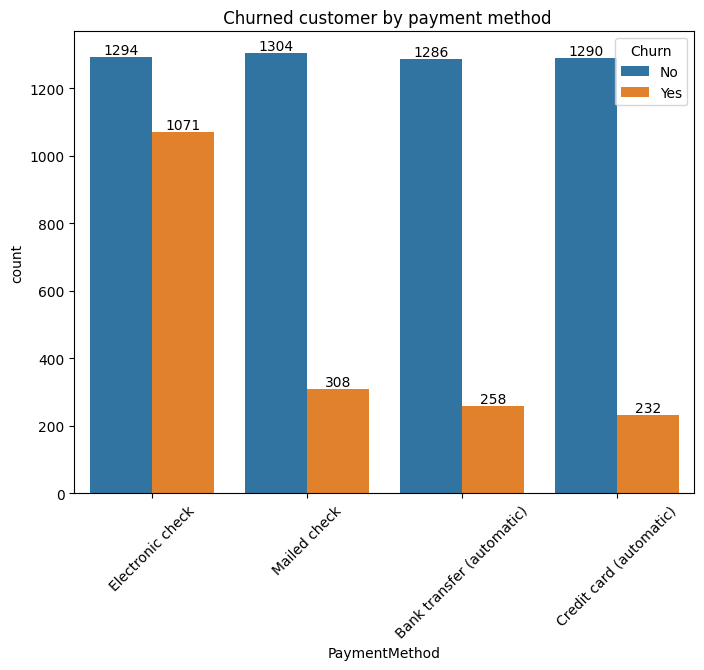

In [10]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title(' Churned customer by payment method')

plt.show()

# Customer is likely to churn when he is using electronic cheque as a payment method